# Homework 1: Word statistics

This is due on **Friday, Sept 16 (11:59pm)**, submitted electronically.  100 points total.

## How to do this problem set

Most of these questions require writing Python code and computing results, and the rest of them have textual answers.  Write all the answers in this document.  Once you are finished, you will upload this `.ipynb` file to Moodle.

A few tips as you develop code:
* *Enter* to edit a cell and *Ctrl-Enter* to re-run a cell.  (see Help -> Keyboard Shortcuts)
* When creating your final version of the problem set to hand in, please do a fresh restart with "Kernel -> Reset" and execute every cell in order.  Then you'll be sure your code doesn't rely on weird global variables you forgot about.  Make sure to press "Save"!

**Your Name:**  *Melisa Bok*

**List collaborators:** *list here*

(see our [grading and policies page](http://people.cs.umass.edu/~brenocon/inlp2016/grading.html) for details on our collaboration policy).


## Part (A): Download dataset and load text

You'll be working with a sample of the [IMDB Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/).

[Here's the sample](http://people.cs.umass.edu/~brenocon/inlp2016/hw1/imdb_pos_sample.zip) for this assignment. It consists of 1126 positive reviews of movies.  Download it and unzip it somewhere and look at a few documents to be sure you know what you're getting.

***A1: Load documents (10 points):***

Load the documents into a dictionary as described below.  `os.listdir()` and `os.path.join()` may be helpful.

In [38]:
from __future__ import division
import os,sys,re,math

# This dictionary will hold all the documents.
# Keys and values are intended to both be strings.
#   Keys: the filename
#   Values: the text content of the file

fname2content = {}  # {filename: text of file}

#-------------------Don't modify the code above-------------------------
#-------------------Provide your answer below--------------------------
file_dir = 'imdb_pos_sample'
for file_name in os.listdir(file_dir):
    with open(os.path.join(file_dir, file_name)) as f: 
        fname2content[file_name] = f.read()


#-------------------Provide your answer above---------------------------
#-------------------Don't modify the code below------------------------
# or only minimally modify it in case your keys have a slightly different format
print "Number of documents loaded: ", len(fname2content)
print fname2content["17_9.txt"][:500]


Number of documents loaded:  1136
This is a complex film that explores the effects of Fordist and Taylorist modes of industrial capitalist production on human relations. There are constant references to assembly line production, where workers are treated as cogs in a machine, overseen by managers wielding clipboards, controlling how much hair the workers leave exposed, and firing workers (Stanley) who meet all criteria (as his supervisor says, are always on time, are hard workers, do good work) but who may in some unspecified fu


You should see the output of above question is as following:

*Number of documents loaded:  1136 <br>
This is a complex film ...*

## Part (B): Tokenize and count words

The goal of this part is to perform simple preprocessing on the raw text and count the words.

***B1: Naive tokenization (10 points):***

For now, assume tokens are based on whitespace.  Write code to calculate the total number of tokens -- this will have to iterate through documents and tokenize each of them.

In [57]:
total_token_num=0

#-------------------Don't modify the code above-------------------------
#-------------------Provide your answer bellow--------------------------

for k, v in fname2content.iteritems():
    total_token_num += len(v.split())
    
#-------------------Provide your answer above---------------------------
#-------------------Don't modify the code bellow------------------------

print "Total Number of tokens: ", total_token_num

Total Number of tokens:  264898


***B2: Better tokenization/normalization (10 points)***

Please develop a better tokenizer and text normalizer yourself -- perhaps using regular expressions, as we discussed in class, and with case normalization.  A good way to experiment with tokenizers is to run them on very small examples, so try to improve the examples below.  (Once it works better on a small sample, you will run it on the larger corpus next.)  Show that your new tokenizer gives better results than a naive tokenizer on these two example texts.

In [78]:
## --- keep this code ---
examples = ["Hello, we are good.",  "OK... I'll go here, ok?"]

print "Naive tokenizations"
for example in examples:
    print example.split()

## --- modify code below ---
def normalize(text):
    return text.lower().replace("<br />", "").replace("'ll", " will").replace("n't", " not")##Add contractions dictionary: https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions

def better_tokenizer(text):
    regex = re.compile(r'\w+|<br />+')
    return regex.findall(normalize(text))

print "Better tokenizations"
for example in examples:
    print better_tokenizer(example)

Naive tokenizations
['Hello,', 'we', 'are', 'good.']
['OK...', "I'll", 'go', 'here,', 'ok?']
Better tokenizations
['hello', 'we', 'are', 'good']
['ok', 'i', 'will', 'go', 'here', 'ok']


In [79]:
better_tokenizer("I'm a Phd. <br />student")


['i', 'm', 'a', 'phd', 'student']

***B3: Word count (10 points):***

Count words from the corpus into the variable `word_counts`, using your `better_tokenizer`.  We initialized the `word_counts` variable as a Python dict; feel free to use `defaultdict(lambda:0)` instead, which is slightly easier to use.  (In the future you may want to check out `Counter`, but please practice dict or defaultdict here.)

Print out 
1. The vocabulary size.
2. The top 10 most common terms.  
  
Important functions to make this easy include dict's `.items()`, list's `.sort()` (and/or standalone `sorted()`) and the `key=` parameter on sort.

In [146]:
#-------------------Provide your answer below--------------------------
word_counts = {}
for k, v in fname2content.iteritems():
    tokens = better_tokenizer(v)
    for t in tokens:
        if t not in word_counts:
            word_counts[t] = 0
        word_counts[t] += 1
vocabulary = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print "Vocabulary size: ", len(vocabulary)
print "10 most common terms: ", vocabulary[:10] 

Vocabulary size:  19142
10 most common terms:  [('the', 15367), ('and', 8196), ('a', 7658), ('of', 6872), ('to', 5985), ('is', 5298), ('in', 4385), ('it', 4176), ('i', 3417), ('that', 3124)]


## Part (C): Data visualization

In this section, you will verify two key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law) and [Heaps' Law](http://en.wikipedia.org/wiki/Heaps'_law). You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

***Question C1: Visualizing Zipf's Law (20 points):***

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is log(frequency).  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.)

**Please remember to label the meaning of the x-axis and y-axis.**


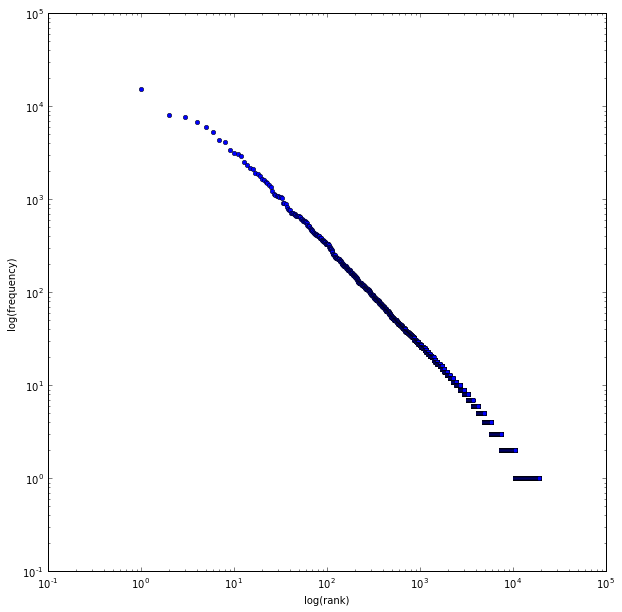

In [210]:
#-------------------Modify code below------------------
# sample plotting code; feel free to delete
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

X = range(1, len(vocabulary) + 1)
Y = [y[1] for y in vocabulary]

ax.scatter(X, Y, linewidth=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")

***Question C2: Interpreting a Zipf plot (5 points):***

You should see some discountinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?


**ANSWER:**

Left: first words of the ranking. High ranking and the big difference in the frequency with the rest of the words.
Right: latest words, ledges because of the words that were not repeated or repeated few times. 
Next cell shows the repeated frequency for the less common words.

In [207]:
from collections import Counter
C = Counter(Y)
print "# words that have the same frequency"
for i in range(1,5):
    print "Frequency " + str(i) + ": ", C[i]

# words that have the same frequency
Frequency 1:  8583
Frequency 2:  3056
Frequency 3:  1644
Frequency 4:  999



***Question C3: Visualizing Heaps' Law (20 points):***

Heaps' Law asserts (in its most basic version) that the vocabulary size of a corpus is approximately proportional to the square root of the number of tokens in the corpus:

$$ |V| = K \sqrt{N_{tok}} $$

where $K$ is a constant specific to the corpus.

We will investigate this phenomenon empirically by iterating over our corpus.  Iterate over each document; for each, calculate the total number of tokens seen so far, and the total number of unique word types seen so far.  We would like to know how these two numbers relate to each other as we see more and more of the corpus.

Create a plot with a curve (lineplot or scatterplot, whatever you think better) where the x-axis is number of tokens, and y-axis is the vocbulary size (so far).  **Make sure to label your axes.**

In [ ]:
#-------------------Provide your answer below--------------------------
# one way to implement: maintain and update a set representing the vocabulary so far.
seen_words=set()

***C4 Heaps' Law: glass half empty (5 points):***

Why is growth in the vocabulary slower than growth in number of tokens, and why does it get slower and slower?

**ANSWER:**

*answerme*

***C5 Heaps' Law: glass half full (5 points):***

Imagine you obtained millions and millions of documents and repeated this experiment.  How long would the vocabulary keep increasing?

**ANSWER:**

*answerme*

***C6: Constants (5 points)***
    
Heaps' Law has a constant in it. Describe something, in either the data or the analysis method, that would affect this constant.  Explain why.

**ANSWER:**

*answerme*

In [64]:
constractions = {
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"gonna":"going to",
"gotta":"got to / got a",
"hadn't":"had not",
"hadn't've":"he had not have",
"hasn't":"has not",
"hasn't've":"has not have",
"haven't":"have not",
"he'd":"he had / he would",
"he'd'n't":"he had not / he would not",
"he'd'n't've":"he had not have / he would not have",
"he'd've":"he would have",
"he'll":"he shall / he will",
"he's":"he has / he is",
"he'sn't":"he has not / he is not",
"how'd":"how did / how would",
"how'll":"how will",
"how's":"how has / how is / how does",
"I'd":"I had / I would",
"I'd'n't":"I had not / I would not",
"I'd'n't've":"I had not have / I would not have",
"I'd've":"I would have",
"I'll":"I shall / I will",
"I'm":"I am",
"I've":"I have",
"I'ven't":"I have not",
"isn't":"is not",
"it'd":"it had / it would",
"it'd'n't":"it had not / it would not",
"it'd'n't've":"it had not have / it would not have",
"it'd've":"it would have",
"it'll":"it shall / it will",
"it's":"it has / it is",
"it'sn't":"it has not / it is not",
"let's":"let us",
"ma'am":"madam",
"mightn't":"might not",
"mightn't've":"might not have",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"not've":"not have",
"o'clock":"of the clock",
"ol'":"old",
"oughtn't":"ought not",
"oughtn't've":"ought not to have",
"shan't":"shall not",
"she'd":"she had / she would",
"she'd'n't":"she had not / she would not",
"she'd'n't've":"she had not have / she would not have",
"she'd've":"she would have",
"she'll":"she shall / she will",
"she's":"she has / she is",
"she'sn't":"she has not / she is not",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody'd":"somebody had / somebody would",
"somebody'd'n't":"somebody had not / somebody would not",
"somebody'd've":"somebody would have",
"somebody'dn't've":"somebody had not have / somebody would not have",
"somebody'll":"somebody shall / somebody will",
"somebody's":"somebody has / somebody is",
"someone'd":"someone had / someone would",
"someone'd'n't":"someone had not / someone would not",
"someone'd'n't've":"someone had not have / someone would not have",
"someone'd've":"someone would have",
"someone'll":"someone shall / someone will",
"someone's":"someone has / someone is",
"something'd":"something had / something would",
"something'd'n't":"something had not / something would not",
"something'd'n't've":"something had not have / something would not have",
"something'd've":"something would have",
"something'll":"something shall / something will",
"something's":"something has / something is",
"'sup":"what's up",
"that'll":"that will",
"that's":"that has / that is",
"that'd":"that would / that had",
"there'd":"there had / there would",
"there'd'n't":"there had not / there would not",
"there'd'n't've":"there had not have / there would not have",
"there'd've":"there would have",
"there're":"there are",
"there's":"there has / there is",
"they'd":"they had / they would",
"they'dn't":"they had not / they would not",
"they'dn't've":"they had not have / they would not have",
"they'd've":"they would have",
"they'd'ven't":"they would have not",
"they'll":"they shall / they will",
"they'lln't've":"they will not have",
"they'll'ven't":"they will have not",
"they're":"they are",
"they've":"they have",
"they'ven't":"they have not",
"'tis":"it is",
"'twas":"it was",
"wanna":"want to",
"wasn't":"was not",
"we'd":"we had / we would",
"we'd've":"we would have",
"we'd'n't":"we had not / we would not",
"we'dn't've":"we had not have / we would not have",
"we'll":"we will",
"we'lln't've":"we will not have",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what shall / what will",
"what're":"what are",
"what's":"what has / what is / what does",
"what've":"what have",
"when's":"when has / when is",
"where'd":"where did",
"where's":"where has / where is / where does",
"where've":"where have",
"who'd":"who would / who had / who did",
"who'd've":"who would have",
"who'll":"who shall / who will",
"who're":"who are",
"who's":"who has / who is / who does",
"who've":"who have",
"why'd":"why did",
"why'll":"why will",
"why're":"why are",
"why's":"why has / why is / why does",
"won't":"will not",
"won't've":"will not have",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'all / ya'll":"you all, literally",
"y'all'd've":"you all would have",
"y'all'dn't've":"you all would not have",
"y'all'll":"you all will",
"y'all'on't":"you all will not",
"y'all'll've":"you all will have",
"y'all're":"you all are",
"y'all'll'ven't":"you all will have not",
"you'd":"you had / you would",
"you'd've":"you would have",
"you'll":"you shall / you will",
"you're":"you are",
"you'ren't":"you are not",
"you've":"you have",
"you'ven't":"you have not"
}

In [65]:
constractions

{"'sup": "what's up",
 "'tis": 'it is',
 "'twas": 'it was',
 "I'd": 'I had / I would',
 "I'd'n't": 'I had not / I would not',
 "I'd'n't've": 'I had not have / I would not have',
 "I'd've": 'I would have',
 "I'll": 'I shall / I will',
 "I'm": 'I am',
 "I've": 'I have',
 "I'ven't": 'I have not',
 "amn't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 'gonna': 'going to',
 'gotta': 'got to / got a',
 "hadn't": 'had not',
 "hadn't've": 'he had not have',
 "hasn't": 'has not',
 "hasn't've": 'has not have',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd'n't": 'he had not / he would not',
 "he'd'n't've": 'he had not have / he would not have',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he's": 'he has / he is',
 "he'sn't": 'he has not / he is not',
 "how'd": 'how did / how would',
 "how'll": 'how will',
